## Command table (work in progress)

Visualization of the command table based on the horizontal bar concept.

---


green
magenta
red
magenta


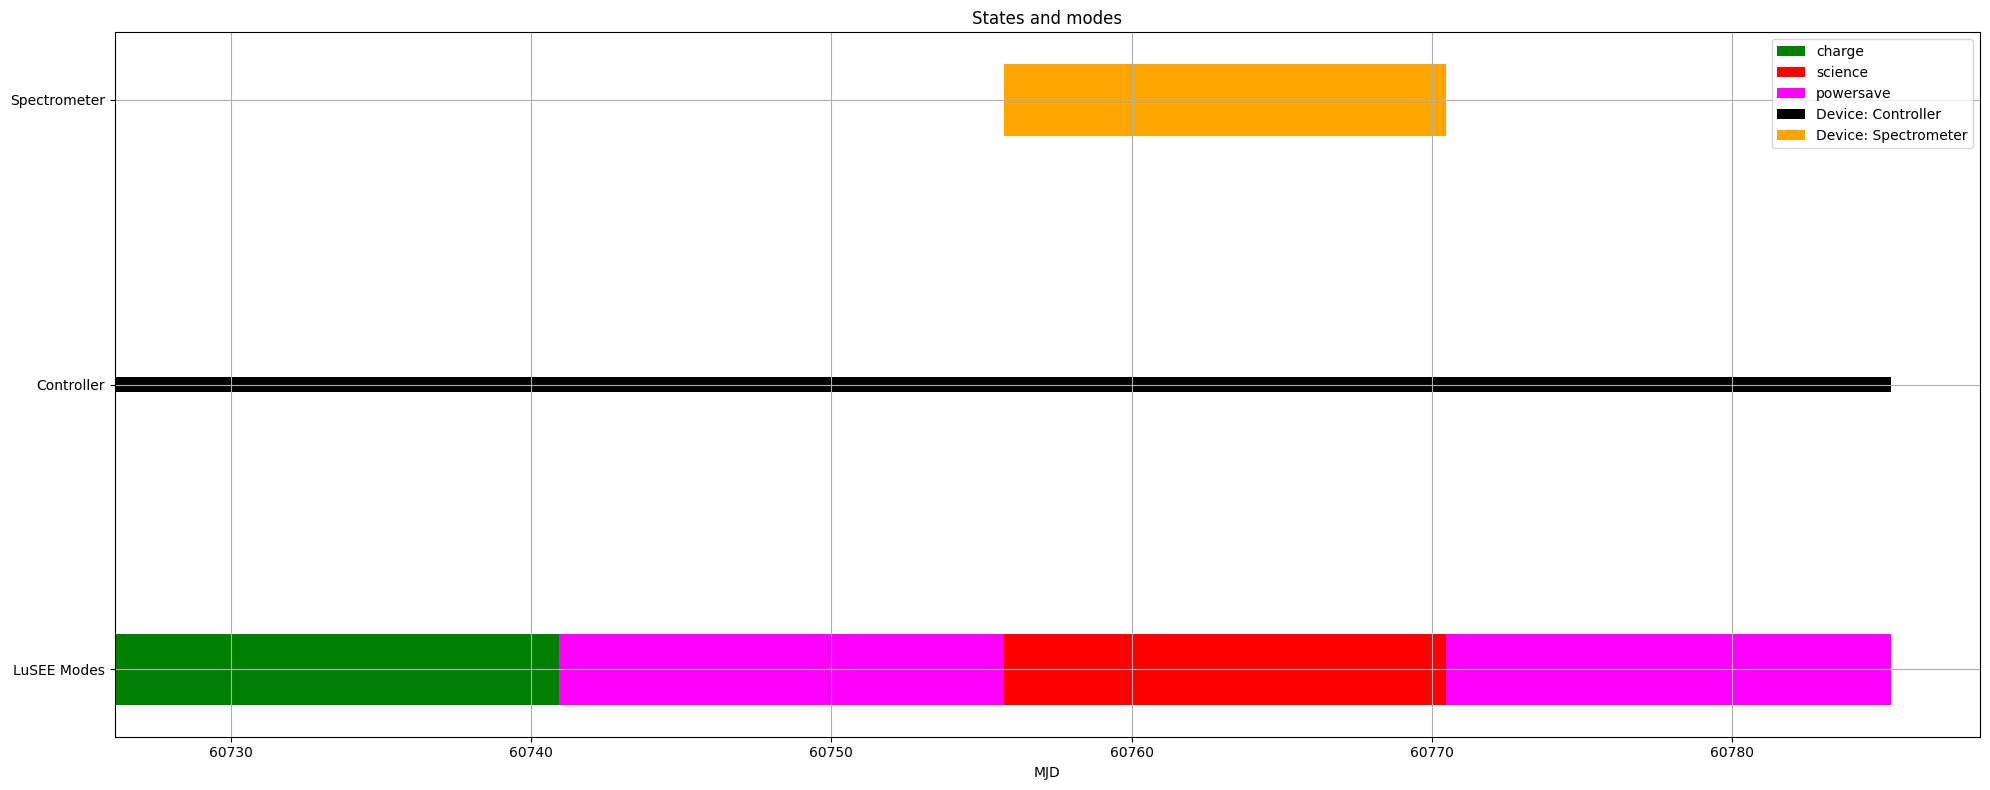

In [38]:
import  matplotlib.pyplot as plt
from    collections import OrderedDict
import  yaml


# Read the comtable into a dict
comtable_f  = "../config/comtable-20250204-20250807.yml"
comtable    = yaml.safe_load(open(comtable_f,'r'))
mode_colors      = {'charge':'green', 'powersave':'magenta', 'science':'red'} # colors, to plot

graph_dict = {}
for k in comtable.keys():
    (start, end) = k.split('-')
    graph_dict[k] = (float(start), float(end), comtable[k])


# Read and parse the map of the modes, into device states
modes_f  = "../config/modes.yml"
modes    = yaml.safe_load(open(modes_f,'r'))


plt.rcParams["figure.figsize"] = [20., 10.]
fig = plt.figure()
ax = fig.add_subplot(111)

for k in graph_dict.keys():
    duration = graph_dict[k][1]-graph_dict[k][0]
    clr = mode_colors[graph_dict[k][2]]
    print(clr)
    ax.barh(['LuSEE Modes'], duration, align='center', left=graph_dict[k][0], height=.25, color=clr,label=comtable[k])
    
    ax.barh(['Controller'], duration, align='center', left=graph_dict[k][0], height=.05, color='black',label='Device: Controller')

    if(comtable[k]=='science'):
        ax.barh(['Spectrometer'], duration, align='center', left=graph_dict[k][0], height=.25, color='orange',label='Device: Spectrometer')

ax.set_xlabel('MJD')
ax.set_title('States and modes')
ax.grid(True)
# ax.legend()
# plt.xlim(60725,60742.5)
plt.tight_layout()

# to remove repetitions in the legend:
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))

key_order = ('charge', 'science', 'powersave', 'Device: Controller', 'Device: Spectrometer')
new_queue = OrderedDict()
for k in key_order:
    new_queue[k] = by_label[k]


plt.legend(new_queue.values(), new_queue.keys())

